# Introductie
(target-linear-regression)=
**Lineaire regressie** is een centraal **model** binnen Machine Learning. Om de wiskunde van ML te begrijpen is het een absolute _must_ om dit model - en vooral ook de geassocieerde leeralgoritmes - ten volle te doorgronden. Het model komt uit de statistiek en veronderstelt dat **bepaalde target data ("_responsvariabele(n)_" genoemd in de statistiek) in lineair verband staan met één of meerdere features (ook wel "_predictoren_" genoemd in de de statistiek**).  
  
(target-coffee-simulation)=
## Data simulatie
We beginnen met de simulatie van een simpele situatie. Stel dat er in een ideale wereld (voor koffiehuizen) een lineaire relatie bestaat tussen de grootte van een bestelling en de fooi die klanten erbovenop betalen:
$$
y = b_1 + b_2x
$$
waarbij $y$ de grootte van de fooi is, $b_1$ een basis fooi en $b_2$ een multiplicatie factor voor de prijs van de aankoop.  
Het _probleem_ dat we willen oplossen is het achterhalen van $b_1$ en $b_2$.  
We verzamelen daarvoor data van $50$ aankopen en houden er rekening mee dat er een meetfout zal zijn: de lineaire relatie zal niet altijd perfect zijn.  
Ons model voor de data is het volgende:

$$
\begin{align}
\pmb{y} &= b_1 + b_2\pmb{x} + \pmb{e} \cr
\pmb{y} &= \pmb{X}\pmb{b} + \pmb{e}
\end{align}
$$

met

$$
\pmb{X} = \begin{bmatrix}
1 & x_1 \cr
1 & x_2 \cr
\vdots & \vdots \cr
1 & x_{50} \cr
\end{bmatrix}
$$

$$
\pmb{b} = \begin{bmatrix}
b_1 \cr
b_2
\end{bmatrix}
$$

We gaan ervan uit dat ieder data punt een additieve ruis component heeft:

$$
e_i = y_i - b_1 - b_2*x_i
$$

met als verwachtte waarde $0$ bij een oneindig aantal observaties:

$$
E(\pmb{e}) = \pmb{0}
$$

Wat impliceert:

$$
E(\pmb{y}) = \pmb{X}\pmb{b}
$$

::: {tip}
Merk terloops op dat we in dit model ervan uitgaan dat de aankoopprijzen $\pmb{x}$ zijn wat ze zijn, dus verkregen zijn _zonder_ meetfout.
:::

Om data te simuleren gebruikten we de volgende waarden voor de modelparameters:

$$
\begin{align}
b_1 &= 0.50 \cr
b_2 &= 0.15
\end{align}
$$

De ruis simuleren we door steekproeven te nemen uit een normale (_Gauss_) verdeling met gemiddelde 0 en standaardafwijking $\sigma=0.30$[^prob]:

$$
e_i \sim N(0, 0.30)
$$
  
(naming-target)=
:::{note} $b_1$, $b_2$ benamingen
In de geometrische voorstelling van lineaire regressie wordt $b_1$ ook het ($y$) _intercept_ genoemd aangezien het verwijst naar het snijpunt van de rechte met de $y$-as (coördinaat $(0, b_1)$). De parameter $b_2$ wordt de _slope_ genoemd omdat die de richtingscoëfficiënt van de rechte uitdrukt.  
In machine learning wordt $b_1$ ook als _bias_ benoemd.
:::
  
Voor de grootte van de orders $\pmb{x}$ te simuleren, trekken we 50 samples uit een _uniforme verdeling_[^prob] met de volgende parameters.

$$
x_i \sim U(3, 25)
$$

[^prob]: We komen hierop terug in de secties over probabiliteit. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from ml_courses.sim.linear_regression_sse_viz import LinearRegressionSSEVisualizer

☕ COFFEE SHOP TIPPING ANALYSIS
True relationship: Tip = $0.50 + 15.0% × Order Total
We collected data from 50 customers
Order range: $3.96 - $24.46
Tip range: $0.94 - $3.90


/opt/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


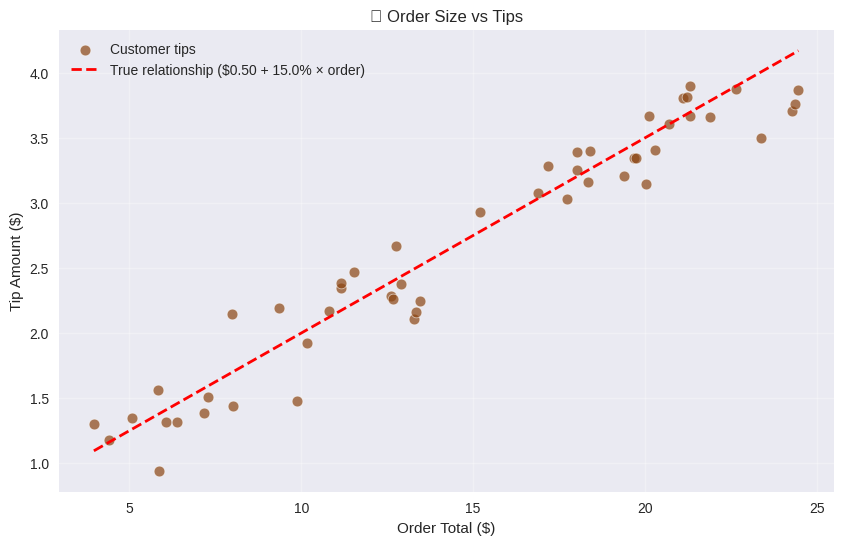


📊 Quick stats:
Average tip percentage: 19.1%
Most generous tip: $3.90 (on $21.31 order)
Most modest tip: $0.94 (on $5.86 order)


In [3]:
rng = np.random.default_rng(42)  # Create a random number generator

# Set style for prettier plots
plt.style.use("seaborn-v0_8")

# Simulate realistic coffee shop data
n_customers = 50

# True relationship: people generally tip ~15% plus a small base amount
true_tip_rate = 0.15  # 15% of order total
true_base_tip = 0.50  # $0.50 base tip regardless of order size
tip_noise_std = 0.30  # Some randomness in tipping behavior

# Generate realistic order totals ($3 to $25)
order_totals = rng.uniform(3, 25, n_customers)
order_totals = np.sort(order_totals)  # Sort for nicer visualization

# Generate corresponding tip amounts with realistic noise
true_tips = true_tip_rate * order_totals + true_base_tip
tip_noise = rng.normal(0, tip_noise_std, n_customers)
observed_tips = np.maximum(0, true_tips + tip_noise)  # Tips can't be negative

print("☕ COFFEE SHOP TIPPING ANALYSIS")
print(f"True relationship: Tip = ${true_base_tip:.2f} + {true_tip_rate:.1%} × Order Total")
print(f"We collected data from {n_customers} customers")
print(f"Order range: ${order_totals.min():.2f} - ${order_totals.max():.2f}")
print(f"Tip range: ${observed_tips.min():.2f} - ${observed_tips.max():.2f}")

# Plot the coffee shop data
plt.figure(figsize=(10, 6))
plt.scatter(
    order_totals,
    observed_tips,
    alpha=0.7,
    color="saddlebrown",
    s=60,
    edgecolor="white",
    linewidth=0.5,
    label="Customer tips",
)
plt.plot(
    order_totals,
    true_tips,
    "r--",
    linewidth=2,
    label=f"True relationship (${true_base_tip:.2f} + {true_tip_rate:.1%} × order)",
)
plt.xlabel("Order Total ($)")
plt.ylabel("Tip Amount ($)")
plt.title("☕ Order Size vs Tips")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Quick stats for context
avg_tip_percent = np.mean(observed_tips / order_totals) * 100
print("\n📊 Quick stats:")
print(f"Average tip percentage: {avg_tip_percent:.1f}%")
print(
    f"Most generous tip: ${observed_tips.max():.2f} (on ${order_totals[np.argmax(observed_tips)]:.2f} order)"
)
print(
    f"Most modest tip: ${observed_tips.min():.2f} (on ${order_totals[np.argmin(observed_tips)]:.2f} order)"
)

:::{important}
Zoals te zien is in de visualisatie, is er geen oplossing voor $\pmb{b} = [b_1, b_2]^T$ die door alle punten loopt. Dit komt door de aanwezigheid van de additieve error vector $\pmb{e} \neq \pmb{0}$ in de simulatie. Mocht $\pmb{e} = \pmb{0}$ zijn, reduceert de lineaire regressie vergelijking tot $\pmb{y} = \pmb{X}\pmb{b}$. Alle punten vallen dan op éénzelfde lijn en we kunnen alle vergelijkingen $y_i = b_1 + b_2x_i$ beschouwen als een stelsel van lineaire vergelijkingen waarvoor we de oplossing kunnen vinden aan de hand van de matrix-inverse van $\pmb{X}$:

$$
\pmb{b} = \pmb{X}^{-1}\pmb{y}
$$

Deze oplossing is hier _niet_ aan de orde omdat het lineaire regressie model veronderstelt dat $\pmb{e} \neq \pmb{0}$.
:::

## _Loss_ functie: $SSE$

:::{note} Definitie
:class: dropdown
De _Loss_ functie is de wiskundige functie die de _sub-optimaliteit_ uitdrukt van parameterschattingen in een bepaalde context. Het doel van het optimalisatie-algorithme is om de output van die functie te _minimaliseren_.[^ml_principles]

:::

Om het leeralgoritme sturen, kiezen we hier voor de **_Sum of Squared Errors ($SSE$)_** functie[^ml_principles]:

$$
\mathcal{L}_{SSE}(f(\pmb{x}); \pmb{y}) = \sum_{i=1}^M(y_i-f(x_i))^2
$$

waarbij

$$
f(\pmb{x}) = \pmb{X}\pmb{\hat{b}} = \hat{\pmb{y}}
$$

De vector $\pmb{y}$-hoedje ($\hat{\pmb{y}}$) staat voor onze _voorspelde waarden_ voor de eigenlijke fooien $\pmb{y}$ _op basis van onze schattingen_ voor de parameters $\hat{\pmb{b}} = \begin{bmatrix} \hat{b_1} & \hat{b_2} \end{bmatrix}^T$ (de argumenten van de _functie_ $f(\pmb{x})$) op een bepaald moment in het leerproces.

:::{note} _Squared_ $L^2$ _loss_
:class: dropdown

Merk op dat we de $SSE$ _loss_ kunnen schrijven als:

$$
\begin{align}
\mathcal{L}_{SSE}(f(\pmb{x}); \pmb{y}) &= \sum_{i=1}^M(y_i-\hat{y_i})^2 \cr
&= \sum_{i=1}^M(y_i-\hat{y_i})(y_i-\hat{y_i})
\end{align}
$$

als we het verschil tussen _geobserveerde_ fooi en _geschatte_ fooi $(y_i-\hat{y_i})$ aanduiden met $\pmb{d_i}$, krijgen we:

$$
\begin{align}
\mathcal{L}_{SSE}(f(\pmb{x}); \pmb{y}) &= \sum_{i=1}^Md_id_i \cr
&= \pmb{d}^T\pmb{d}
\end{align}
$$

(target-sse)=
Terugkijkend naar de definitie van de Euclidische norm ($L^2$; $||\pmb{a}||_2 = \sqrt{\pmb{a}^T\pmb{a}}$), volgt dat de $SSE$ _loss_ overeenkomt met het _kwadraat_ van de $L^2$ norm van de vector van verschillen $\pmb{d}$ tussen geobserveerde waarden $\pmb{y}$ en geschatte waarden $\hat{\pmb{y}}$. 
:::

:::{important} _Mean Squared Error ($MSE$) loss_  
(target-mse)=
In de praktijk wordt vaak met het gemiddelde van de gekwadrateerde verschillen gewerkt, de zogeheten _Mean Squared Error ($MSE$) loss_:

$$
\mathcal{L}_{MSE}(f(\pmb{x}); \pmb{y}) = \frac{\sum_{i=1}^M(y_i-f(x_i))^2}{M}
$$

of 

$$
\mathcal{L}_{MSE}(f(\pmb{x}); \pmb{y}) = \frac{\mathcal{L}_{SSE}}{M}
$$

$\mathcal{L}_{MSE}$ is dus identiek aan $\mathcal{L}_{SSE}$, op de factor $\frac{1}{M}$ na. Bij de wiskundige uiteenzettingen gebruiken we $\mathcal{L}_{SSE}$ omwille van eenvoud in notatie. In de praktijk verkiezen we $\mathcal{L}_{MSE}$ wegens het risico op _overflow error_ bij $\mathcal{L}_{SSE}$.
:::

**De bedoeling van het _leeralgoritme_ is dus om op zoek te gaan naar waarden voor de model parameters $\pmb{b}$ die $\mathcal{L}_{SSE}$ _minimaliseren_**.

[^ml_principles]: Zoals gezien in de cursus _ML Principles_

In [4]:
def calculate_loss(b1, b2, x, y):
    """
    Calculate how badly our guessed relationship predicts actual tips.

    Parameters
    ----------
    b1 : float
        The base tip amount in dollars
    b2 : float
        The percentage rate (e.g., 0.15 for 15%)
    x : array
        Customer order amounts
    y : array
        Actual tips customers left

    Returns
    -------
    float : sum of squared prediction errors (lower = better)
    """
    y_hat = b1 + b2 * x
    d = y - y_hat
    loss = np.sum(d**2)  # Sum of squared errors
    return loss

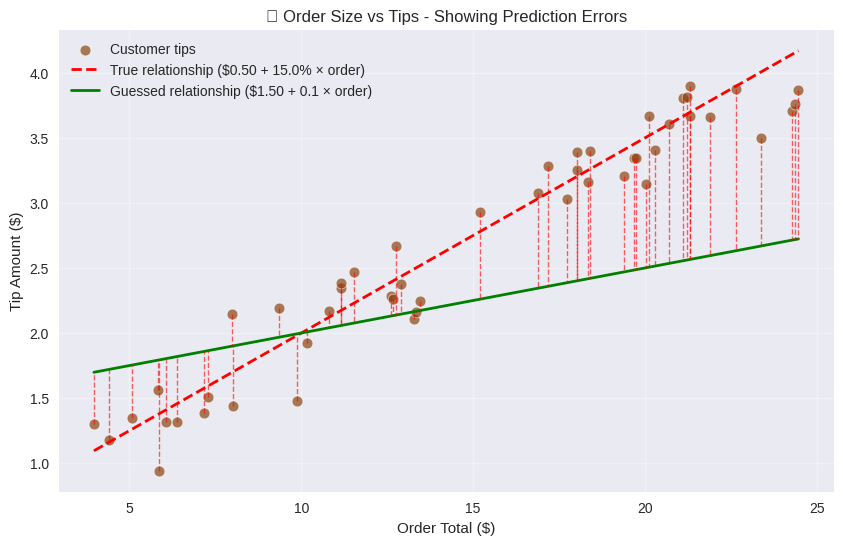

📊 SSE Loss with guessed parameters (b1=$1.50, b2=0.1): 27.65


In [5]:
# Define the guessed parameters
b1_guess = 1.5  # Base tip guess
b2_guess = 0.05  # Tip rate guess

# Calculate predicted values using the guessed parameters
predicted_tips = b1_guess + b2_guess * order_totals

# Calculate the SSE loss for these parameters
guess_loss = calculate_loss(b1_guess, b2_guess, order_totals, observed_tips)

# Create the visualization
plt.figure(figsize=(10, 6))

# Plot the observed data points
plt.scatter(
    order_totals,
    observed_tips,
    alpha=0.7,
    color="saddlebrown",
    s=60,
    edgecolor="white",
    linewidth=0.5,
    label="Customer tips",
)

# Plot true relationship
plt.plot(
    order_totals,
    true_tips,
    "r--",
    linewidth=2,
    label=f"True relationship (${true_base_tip:.2f} + {true_tip_rate:.1%} × order)",
)

# Plot the guessed relationship line (green)
plt.plot(
    order_totals,
    predicted_tips,
    "g-",
    linewidth=2,
    label=f"Guessed relationship (${b1_guess:.2f} + {b2_guess:.1f} × order)",
)

# Add error lines from each point to the green line
for i in range(len(order_totals)):
    plt.plot(
        [order_totals[i], order_totals[i]],
        [observed_tips[i], predicted_tips[i]],
        "r--",
        alpha=0.6,
        linewidth=1,
    )

# Formatting
plt.xlabel("Order Total ($)")
plt.ylabel("Tip Amount ($)")
plt.title("☕ Order Size vs Tips - Showing Prediction Errors")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print the loss value
print(
    f"📊 SSE Loss with guessed parameters (b1=${b1_guess:.2f}, b2={b2_guess:.1f}): {guess_loss:.2f}"
)

## Visualisatie van het $SSE$ oppervlak

We kunnen in deze éénvoudige simulatie met 2 parameters ($b_1$ en $b_2$), de $SSE$ _loss_ functie voorstellen als een 3D oppervlak: $\{x: b_1, y: b_2, z: SSE\}$. We maken:
1. een _grid_ van $(b_1, b_2)$ coördinaten $(x, y)$,
2. berekenen de overeenkomstige $SSE$ (als $z$-coördinaat) en
3. stellen de resulterende 3D coördinaten voor als een oppervlak.

In [6]:
viz = LinearRegressionSSEVisualizer(
    x_data=order_totals,
    y_data=observed_tips,
    true_bias=true_base_tip,
    true_slope=true_tip_rate,
)

fig = viz.create_3d_surface_plot(resolution=40)
fig.show()

:::{important} Standaardisatie
(target-standard-deviation)=
De inspectie van het oppervlak is gevoelig aan de schaal van de variabelen. Het is algemeen (ook om wiskundige redenen) beter om onze variabelen te herschalen zodat hun gemiddelde $0$ is en hun **standaardafwijking** gelijk aan $1$. De **standaardafwijking is een belangrijke maat van spreiding rond het gemiddelde**. **Ze wordt berekend als de vierkantswortel van het gemiddelde van de gekwadrateerde verschillen ten opzicht van het gemiddelde**:

$$
STD(\pmb{x}) = sd_x = \sqrt{\frac{\sum_{i=1}^M(x_i-\overline{\pmb{x}})^2}{M}}
$$

(target-standardization)=
Een een standaard-schaling of **_standaardisatie_ houdt in dat we een variabele of verzameling van metingen (1) _centreren_ zodat het gemiddelde** $0$ **wordt en (2) _schalen_ zodat de standaardafwijking** $1$ **wordt**:

$$
\pmb{x}_s = \frac{\pmb{x}-\overline{\pmb{x}}}{sd_x}
$$
:::

:::{note}
:class: dropdown

Ter illustratie kan je hier zien hoe we de parameterwaarden voor $b_1$ en $b_2$ die we hebben gebruikt bij de simulatie moeten omvormen wanneer we $\pmb{y}$ en $\pmb{x}$ standaardiseren.

Als

$$
\begin{align}
\pmb{y}_s &= \frac{\pmb{y} - \pmb{\overline{y}}}{sd_{\pmb{y}}} \cr
\pmb{x}_s &= \frac{\pmb{x}-\overline{\pmb{x}}}{sd_x}
\end{align}
$$

dan

$$
\begin{align}
\pmb{y} &= \pmb{y}_s sd_{\pmb{y}} + \pmb{\overline{y}} \cr
\pmb{x} &= \pmb{x}_s sd_{\pmb{x}} + \pmb{\overline{x}}
\end{align}
$$

Als we dit in de oorspronkelijke regressievergelijking $\pmb{y} = b_1 + b_2\pmb{x} + \pmb{e}$ invoegen, krijgen we:

$$
\begin{align}
\pmb{y}_s sd_{\pmb{y}} + \pmb{\overline{y}} &= b_1 + b_2 \pmb{x}_s sd_{\pmb{x}} + \pmb{\overline{x}} + \pmb{e} \cr
\pmb{y}_s sd_{\pmb{y}} &= b_1 + b_2 \pmb{x}_s sd_{\pmb{x}} + \pmb{\overline{x}} + \pmb{e} - \pmb{\overline{y}} \cr
\pmb{y}_s sd_{\pmb{y}} &= (b_1 - \pmb{\overline{y}} + \pmb{\overline{x}}) + (b_2 sd_{\pmb{x}})\pmb{x}_s  + \pmb{e} \cr
\pmb{y}_s &= \frac{(b_1 - \pmb{\overline{y}} + \pmb{\overline{x}})}{sd_{\pmb{y}}} + \frac{(b_2 sd_{\pmb{x}})}{sd_{\pmb{y}}}\pmb{x}_s  + \frac{\pmb{e}}{sd_{\pmb{y}}} \cr
\pmb{y}_s &= {b_1}_s + {b_2}_s\pmb{x}_s  + \pmb{e}_s
\end{align}
$$

met

$$
\begin{align}
{b_1}_s &= \frac{(b_1 - \pmb{\overline{y}} + \pmb{\overline{x}})}{sd_{\pmb{y}}} \cr
{b_2}_s &= \frac{(b_2 sd_{\pmb{x}})}{sd_{\pmb{y}}} \cr
\pmb{e}_s &= \frac{\pmb{e}}{sd_{\pmb{y}}}
\end{align}
$$

:::

In [7]:
# Standardize the data
order_totals_mean = np.mean(order_totals)
order_totals_std = np.std(order_totals)
order_totals_scaled = (order_totals - order_totals_mean) / order_totals_std

observed_tips_mean = np.mean(observed_tips)
observed_tips_std = np.std(observed_tips)
observed_tips_scaled = (observed_tips - observed_tips_mean) / observed_tips_std

In [8]:
# Visualize standardization
px.histogram(
    pd.DataFrame(
        {
            "Scaled": np.concat(
                (np.full(observed_tips.shape, False), np.full(observed_tips.shape, True))
            ),
            "Order Total": np.concatenate((order_totals, order_totals_scaled)),
        }
    ),
    x="Order Total",
    color="Scaled",
    title="Distribution of Order Totals: Original vs Standardized",
    nbins=50,
    marginal="rug",
    width=800,
)

In [9]:
viz = LinearRegressionSSEVisualizer(
    x_data=order_totals,
    y_data=observed_tips,
    true_bias=true_base_tip,
    true_slope=true_tip_rate,
    standardize=True,
)

fig = viz.create_3d_surface_plot(resolution=40)
fig.show()

## _Grid parameter search_
(target-grid-search)=
In de visualisatie is het coördinaat waar de $SSE$ het kleinst is in het groen aangeduid. Zeker in de geschaalde versie kan je zien dat de $SSE$ langs alle zijden van dit punt oploopt. Er is één absoluut minimum en geen _lokale minima_. Een oppervlak met dergelijke eigenschappen wordt een _convexe_ oppervlakte genoemd. Het minimum komt hier overeen met $b_1 = 0.615$ en $b_2 = 0.138$. Dit ligt in de buurt van onze simulatie parameters ($b_1 = 0.50$, $b_2 = 0.15$). De enige afwijking is te wijten aan onze keuze van _spacing_ in het _grid_. Deze _brute force_ **methode om aan de hand van een $N$-D _parameter grid_ het minimum van de _loss_ functie te zoeken** is op zich een leeralgoritme en wordt **grid search** genoemd.  
### Voordeel
Geen complexe wiskunde nodig.
### Nadeel
We weten normaal niet op voorhand in welke _range_ we moeten werken voor een bepaalde parameter. Zeker wanneer het aantal parameters stijgt, wordt het snel een onmogelijke opdracht om grid search toe te passen - ook vanuit computationeel perspectief. Je komt de techniek het vaakst tegen bij _hyper parameter tuning_ als het aantal hyper parameters en mogelijke hyper parameter waarden beperkt is.

(target-r2)=
:::{note} R² als maat voor _goodness of fit_

Een veelgebruikte maat om te evalueren hoe goed een bepaalde oplossing van een lineair regressiemodel de data beschrijft, is de **R-squared of $R^2$** waarde (ook wel **determinatiecoëfficiënt** genoemd).

**De $R^2$ waarde geeft aan welk percentage van de variantie in de target $\pmb{y}$ verklaard wordt door het lineaire model**. De formule is:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

waarbij:
- $SS_{res} = \sum_{i=1}^n(y_i - \hat{y}_i)^2$ de som van gekwadrateerde residuen is (onze $SSE$)
- $SS_{tot} = \sum_{i=1}^n(y_i - \bar{y})^2$ de totale som van kwadraten is (dit komt overeen met de $SSE$ ten opzichte van een model waarbij $\hat{b_1} = \overline{\pmb{y}} =  \frac{\sum_{i=1}^My_i}{M}$ en $\hat{b_1}, \hat{b_2}, \ldots = 0$)

### Interpretatie
- $R^2 = 1$: Het model verklaart 100% van de variantie (perfecte fit)
- $R^2 = 0$: Het model doet het niet beter dan simpelweg het gemiddelde te voorspellen
- $0 < R^2 < 1$: Het model verklaart een deel van de variantie

Een hoge $R^2$ waarde betekent niet automatisch dat het model goed is. Zo zal $R^2$ automatisch groeien als er meer features worden opgenomen in het model (zelfs irrelevante). Hoewel daar correcties voor bestaan[^adjusted], is het belangrijk om ook andere diagnostische hulpmiddelen te gebruiken, zoals residuele plots en het valideren op nieuwe data.
:::

[^adjusted]: Zogenoemde _adjusted_ $R^2$.